In [1]:
#librerias 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import os 
import re 
import seaborn as sns
sns.set_theme()

import matplotlib.colors as mcolors


In [2]:
BASE_DATA_DIR="../data2apply/"
data_dir=os.path.join(BASE_DATA_DIR,"pump_data")
train_dir=os.path.join(data_dir,"sensor.csv")

In [3]:
df=pd.read_csv(train_dir,index_col=0)
df["machine_status"]=df["machine_status"].map({"NORMAL":0,"RECOVERING":-1,"BROKEN":-2})

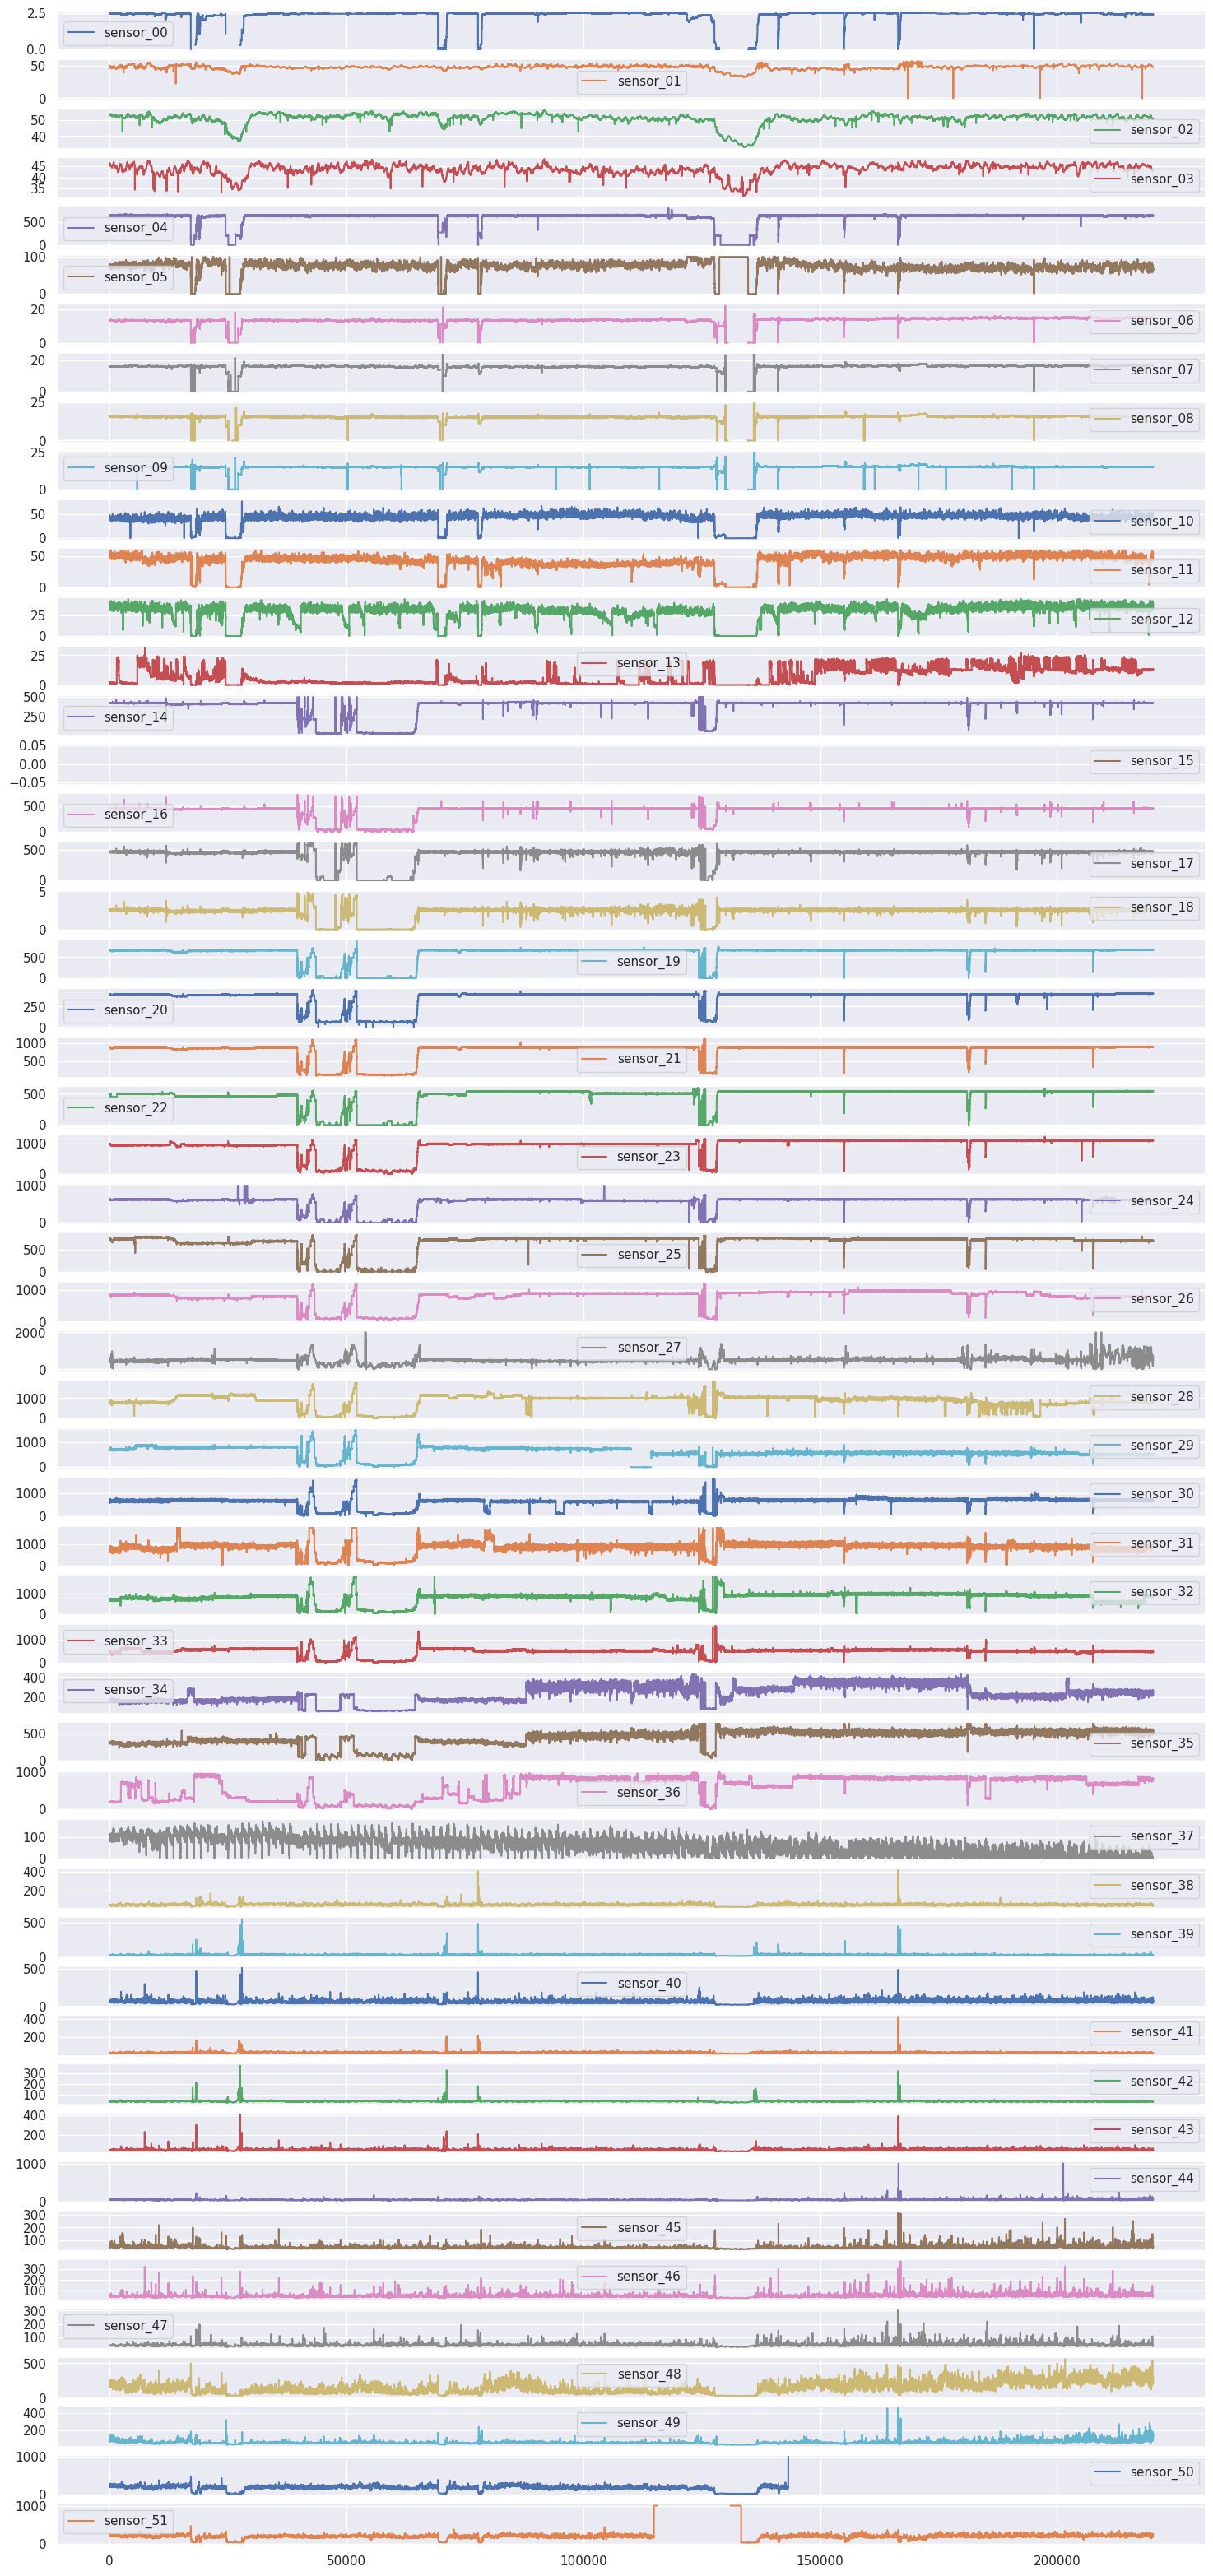

In [5]:
def add_shaded_region(start, end, axes, color='red', alpha=0.3):
    for ax in axes:
        ax.axvspan(start, end, color=color, alpha=alpha)


# Identificar y sombrear las regiones donde machine status es distinto de 0
regions = []
start = None
for index, value in df['machine_status'].items():
    if value != 0 and start is None:
        start = index
    elif value == 0 and start is not None:
        regions.append((start, index))
        start = None

if start is not None:
    regions.append((start, len(df)))

i=0
for start, end in regions:
    if start == end - 1:  # Si solo hay una muestra, dibuja una línea vertical
        for ax_aux in ax:
            ax_aux.axvline(start, color="red", alpha=0.3)
            i+=1
    else:
        add_shaded_region(start, end, ax)

plt.show()

ax=df.iloc[:,1:-1].plot(subplots=True,figsize=(18,40))


sensor_00
sensor_01
sensor_02
sensor_03
sensor_04
sensor_05
sensor_06
sensor_07
sensor_08
sensor_09
sensor_10
sensor_11
sensor_12
sensor_13
sensor_14
sensor_15
sensor_16
sensor_17
sensor_18
sensor_19
sensor_20
sensor_21
sensor_22
sensor_23
sensor_24
sensor_25
sensor_26


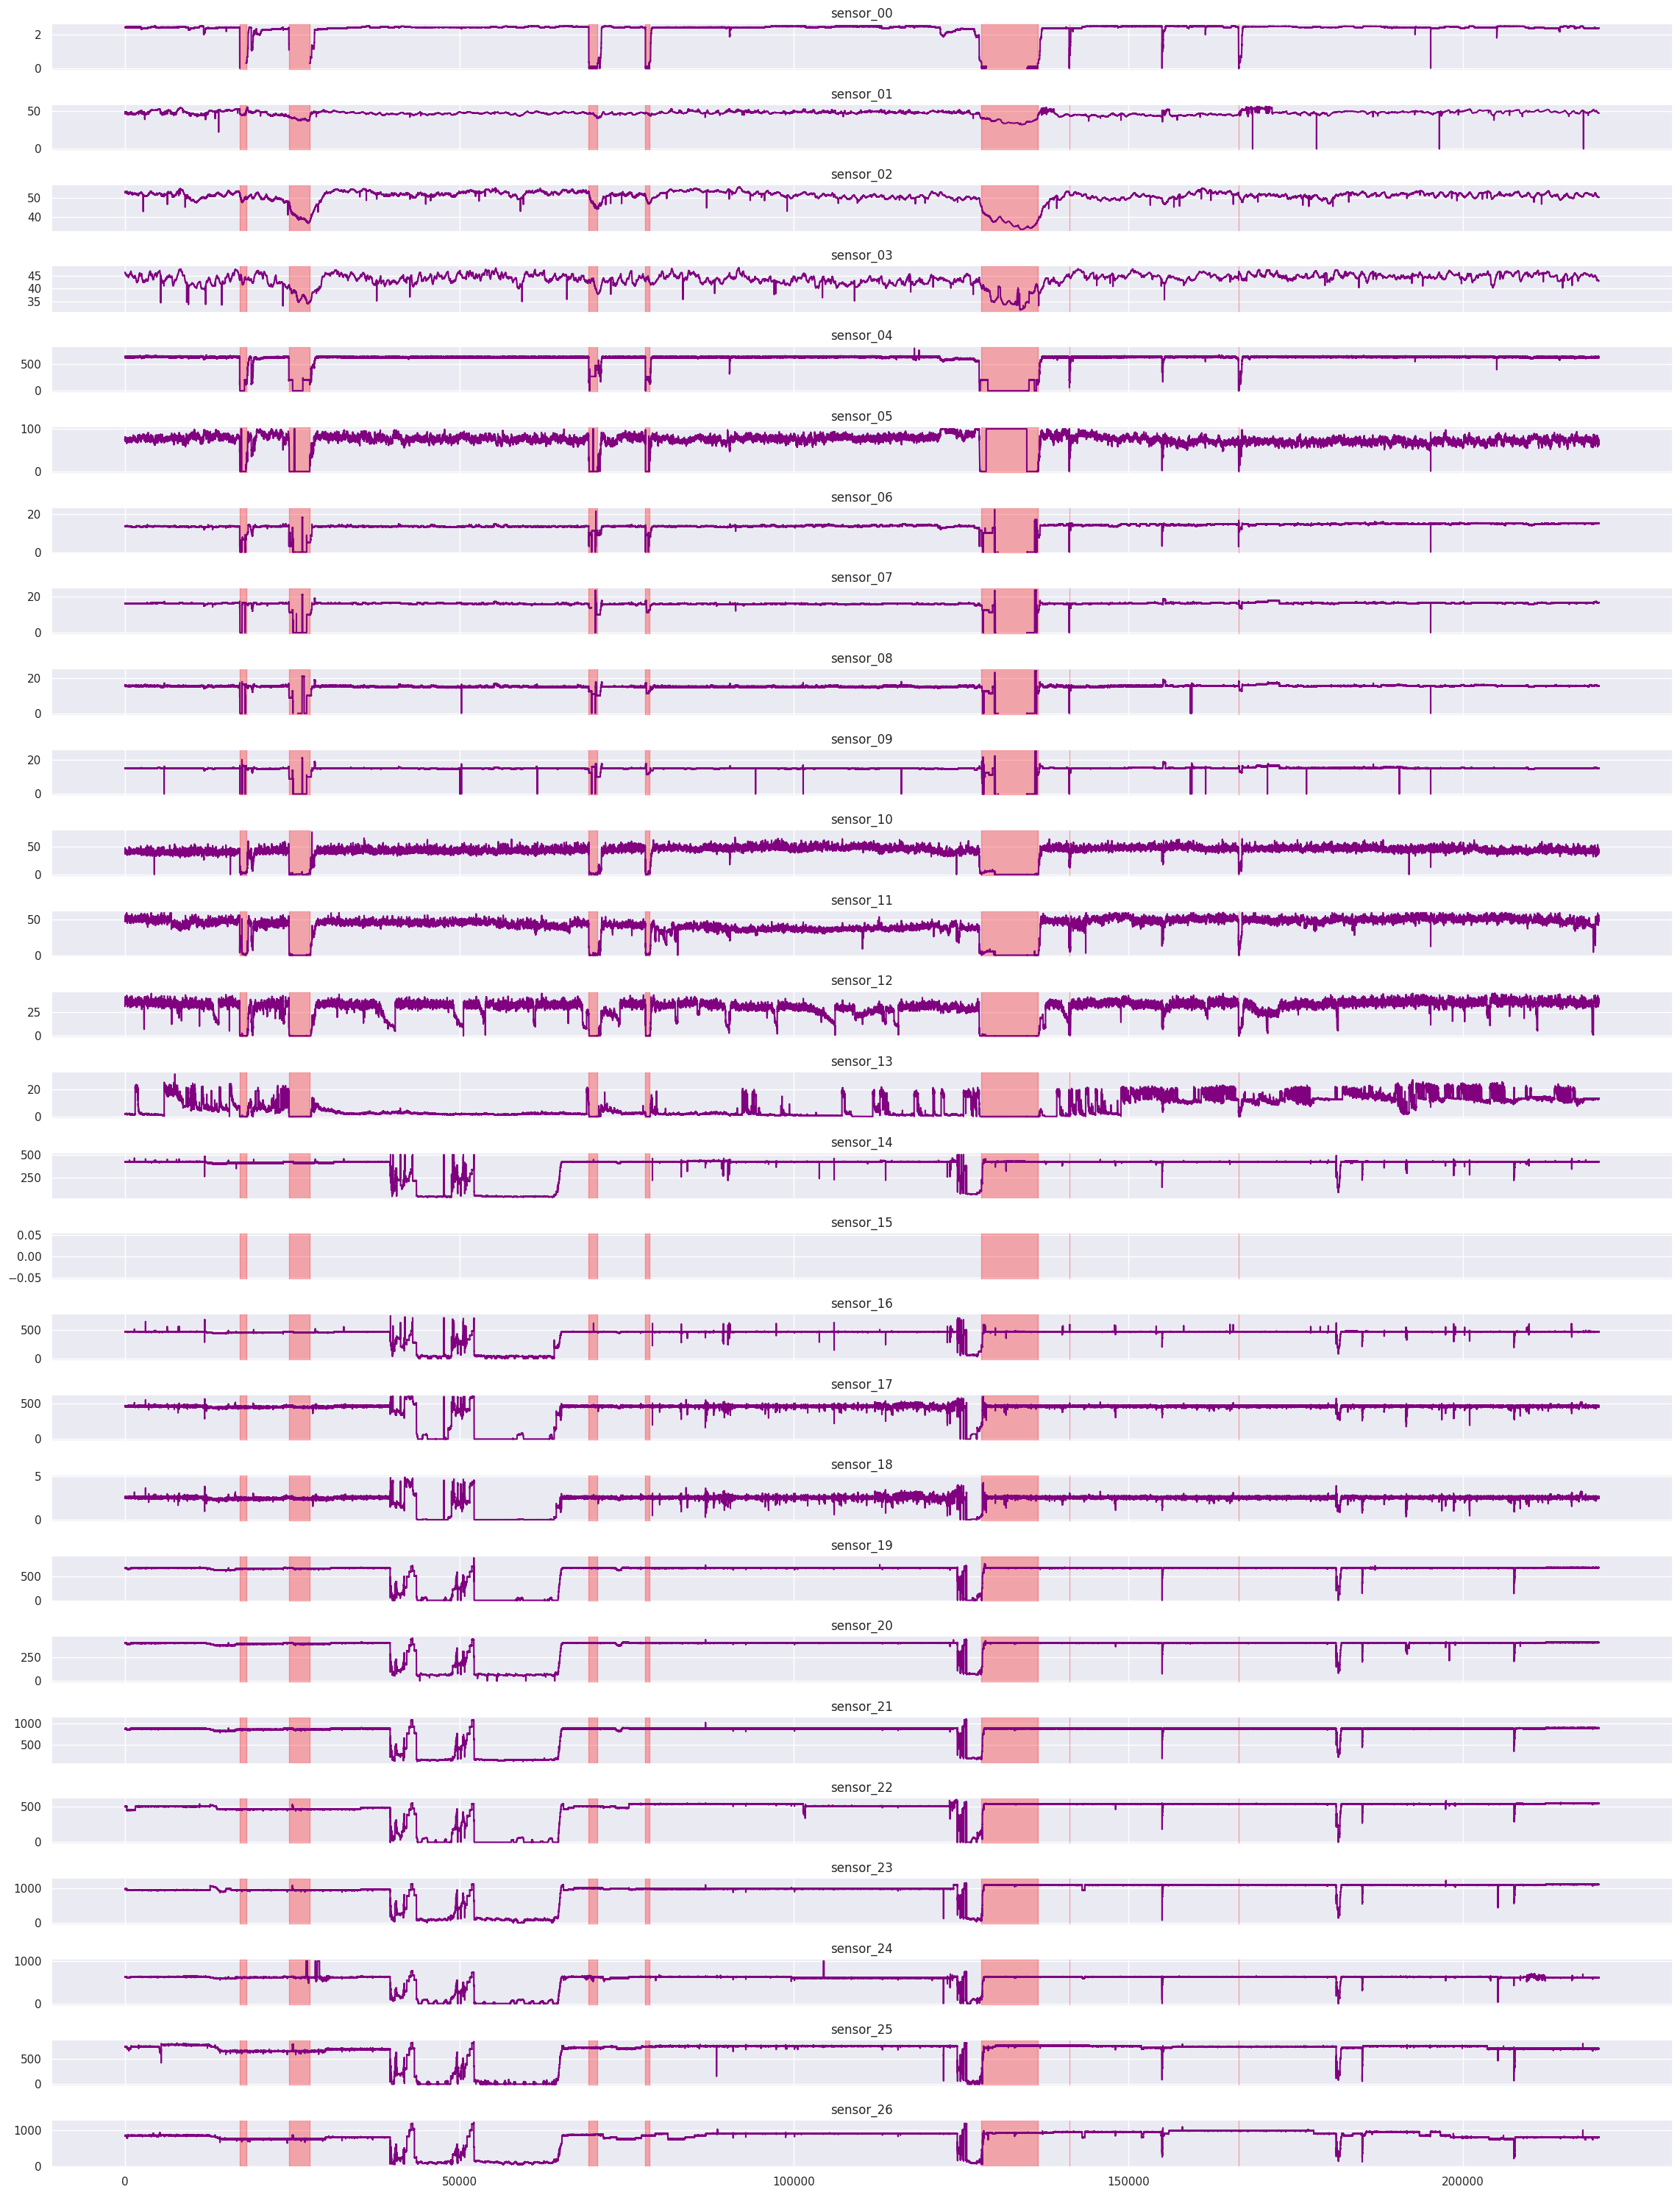

In [13]:

df_señal=df.iloc[:,1:-26]


fig, axes = plt.subplots(nrows=len(df_señal.columns), ncols=1, figsize=(23, 30),sharex=True)
for i,name in enumerate(df_señal.columns):
    print(name)
    axes[i].plot(df_señal[name],color="purple")
    axes[i].set_title(name)




# Función para agregar el área sombreada
def add_shaded_region(start, end, axes, color='red', alpha=0.3):
    for ax in axes:
        ax.axvspan(start, end, color=color, alpha=alpha)


# Identificar y sombrear las regiones donde machine status es distinto de 0
regions = []
start = None
for index, value in df['machine_status'].items():
    if value != 0 and start is None:
        start = index
    elif value == 0 and start is not None:
        regions.append((start, index))
        start = None

if start is not None:
    regions.append((start, len(df)))

i=0
for start, end in regions:
    if start == end - 1:  # Si solo hay una muestra, dibuja una línea vertical
        for ax in axes:
            ax.axvline(start, color="red", alpha=0.3)
            i+=1
    else:
        add_shaded_region(start, end, axes)

plt.tight_layout()

Vamos a ver donde tenemos los datos faltantes

In [10]:
df.iloc[:,1].index.to_numpy()


array([     0,      1,      2, ..., 220317, 220318, 220319])

In [24]:
df.isna().sum(axis=0)

timestamp              0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16
sensor_38             27


In [27]:
df.loc[df["machine_status"]!=0].index.to_numpy()

Index([ 17155,  17156,  17157,  17158,  17159,  17160,  17161,  17162,  17163,
        17164,
       ...
       166506, 166507, 166508, 166509, 166510, 166511, 166512, 166513, 166514,
       166515],
      dtype='int64', length=14484)

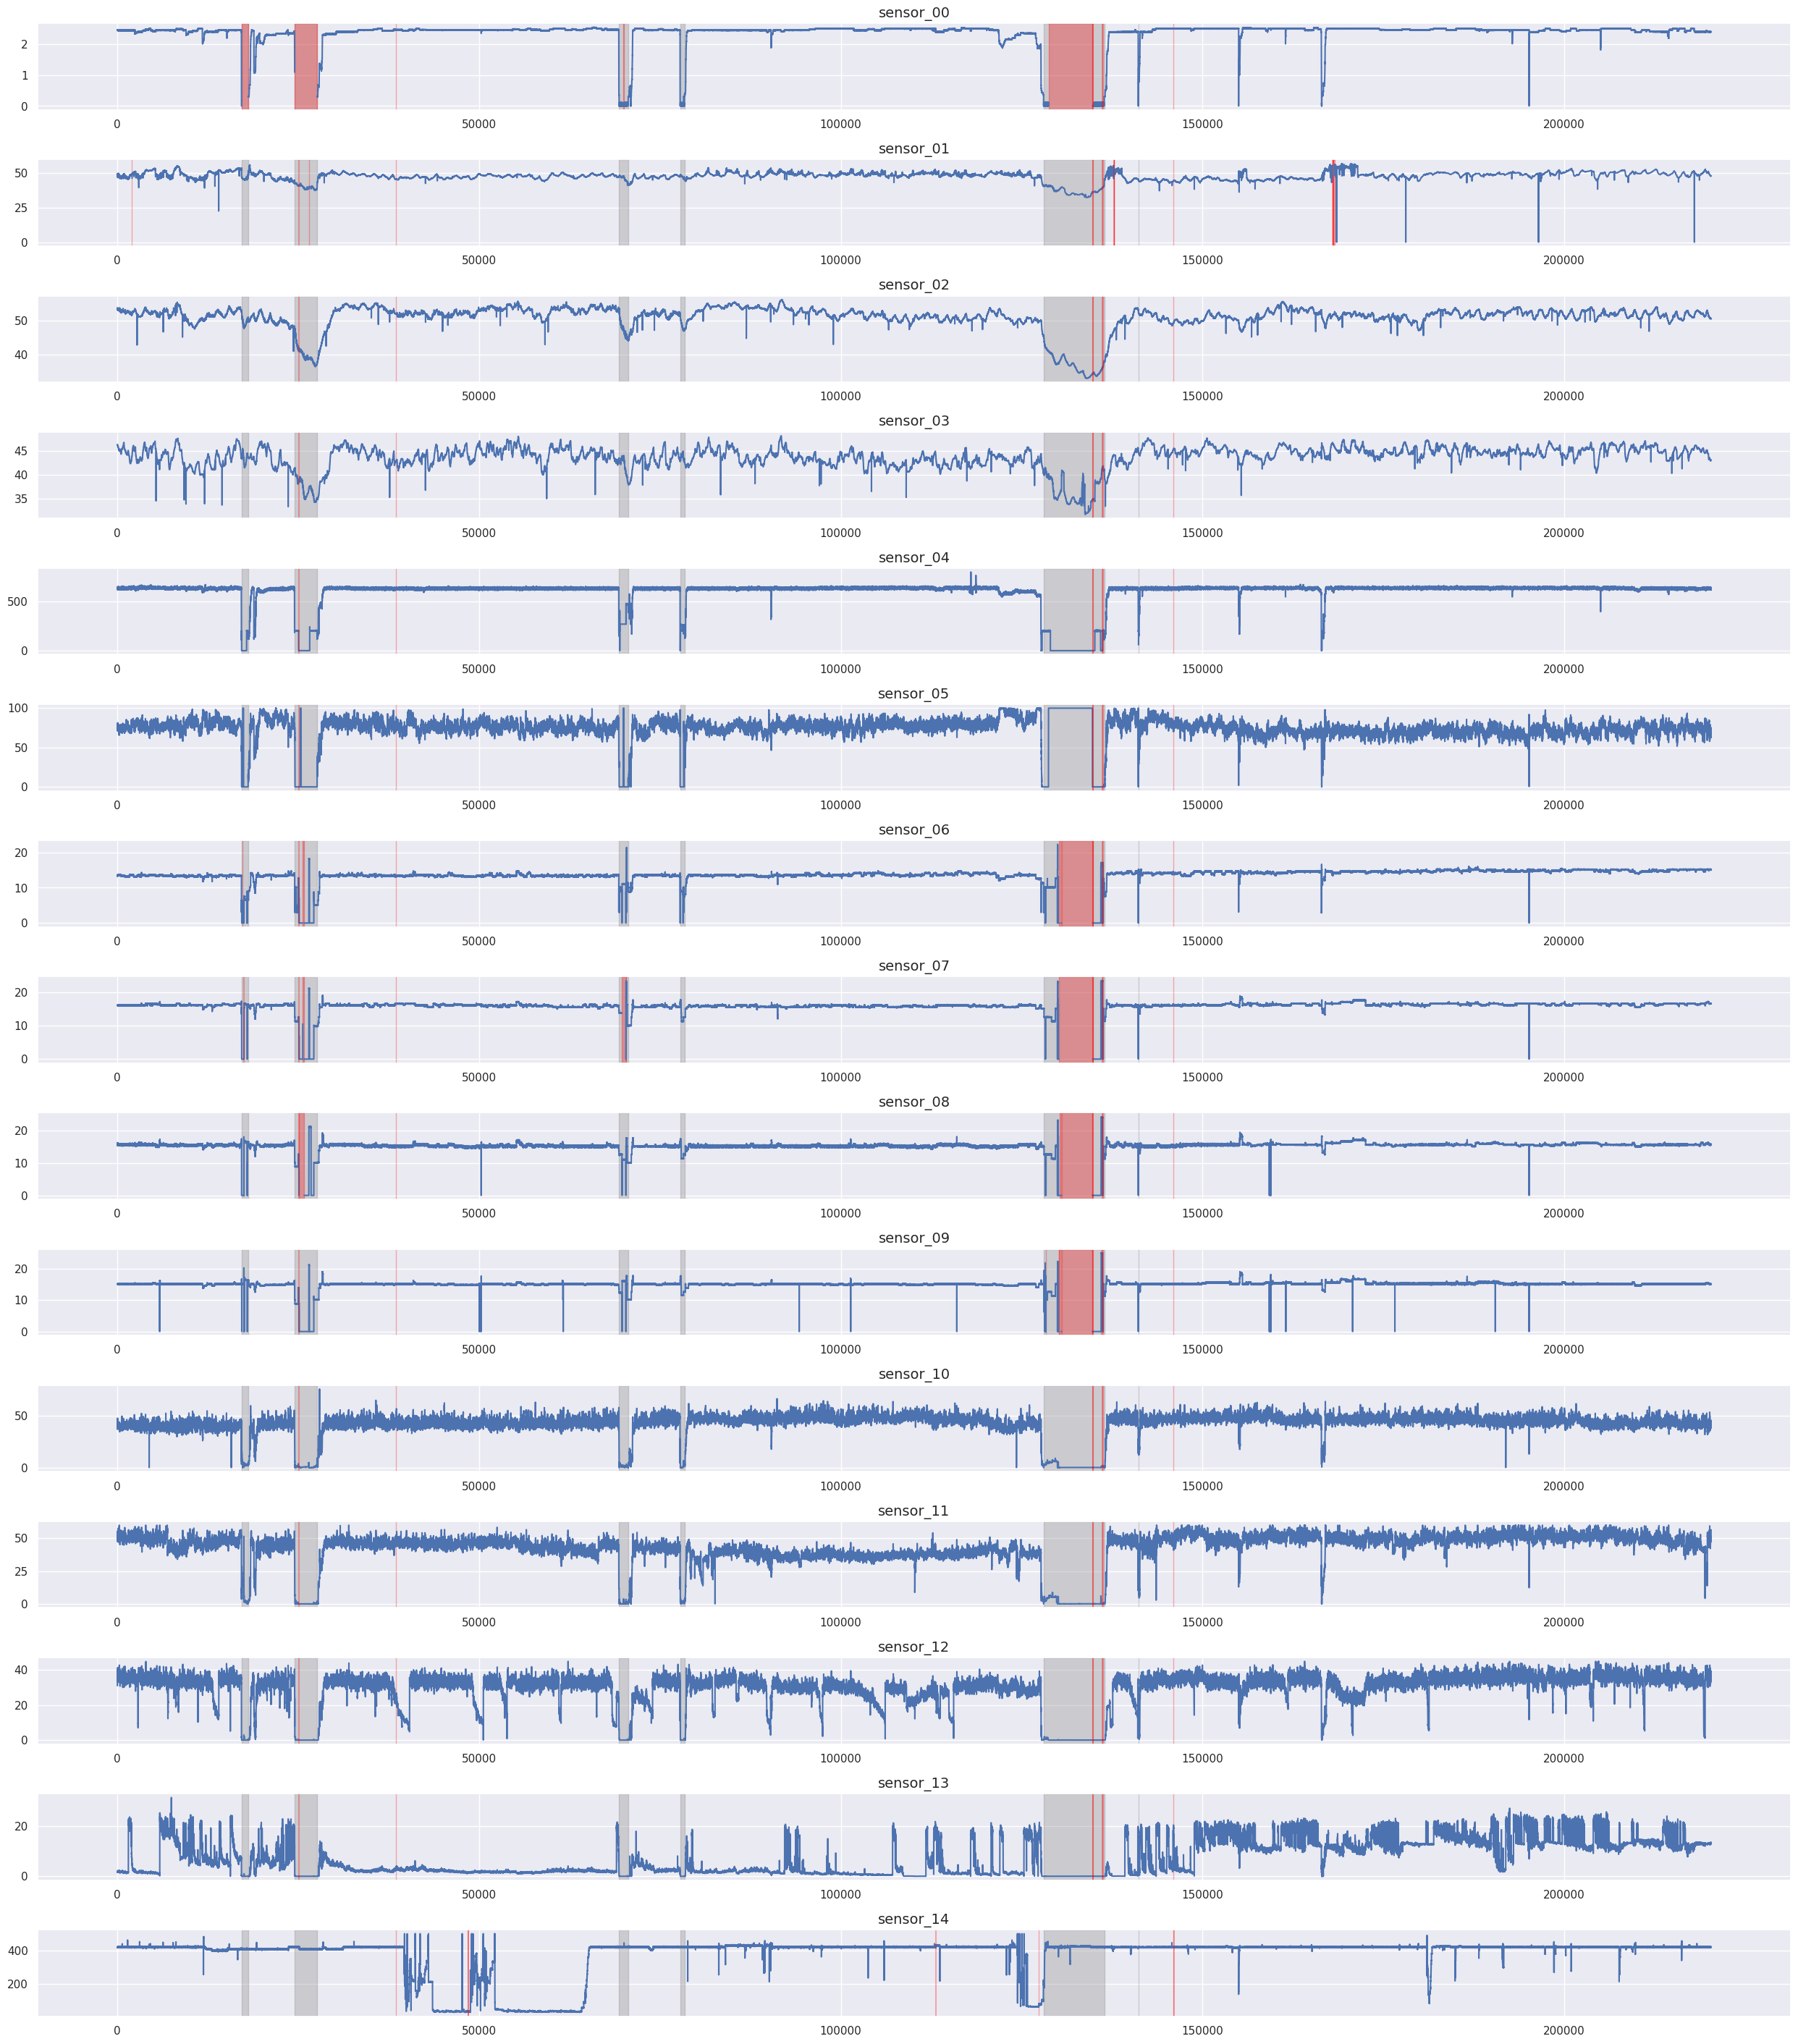

In [32]:
plt.figure(figsize=(25,30))
for j in range(1,16):
    plt.subplot(16,1,j)
    aux=df.iloc[:,j].to_numpy()
    x=df.iloc[:,j].index.to_numpy()
    aux2=df.isna().iloc[:,j]
    anom_x=aux2[aux2].index.to_numpy()
    plt.plot(aux)




    borken_index=df.loc[df["machine_status"]!=0].index.to_numpy()
    start=True
    init=borken_index[0]
    for i in range(len(borken_index)-1):
        if borken_index[i+1]==(1+borken_index[i]):
            pass
        else:
            if init==borken_index[i]:
                plt.axvline(init,alpha=0.1,color="grey")
                init=borken_index[i+1]
            else:
                plt.axvspan(init,borken_index[i],alpha=0.3,color="grey")
                init=borken_index[i+1]






    start=True
    init=anom_x[0]
    for i in range(len(anom_x)-1):
        if anom_x[i+1]==(1+anom_x[i]):
            pass
        else:
            if init==anom_x[i]:
                plt.axvline(init,alpha=0.3,color="red")
                init=anom_x[i+1]
            else:
                plt.axvspan(init,anom_x[i],alpha=0.3,color="red")
                init=anom_x[i+1]
    plt.title(df.columns[j],fontsize=14)

plt.tight_layout()
    